### Informações do grupo 3
- Nomes: Ricardo Endres,
- Turma: 1008
- link dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## Objetivo Principal do Conjunto de Dados

O objetivo principal deste conjunto de dados é fornecer insights sobre os fatores que afetam os salários dos profissionais na área de ciência de dados. Ele pode ser usado para responder perguntas como:

* Qual é o salário médio anual em empresas de médio porte nos EUA nos anos de 2022 e 2023?
* Como o salário médio varia de acordo com o nível de experiência para engenheiros de dados e cientistas de dados em empresas de médio porte nos EUA?
* Quais são os salários médios do cargo para cargos de nível inicial/júnior em empresas de pequeno, médio e grande porte?
* Como estão ganhando os Data Scientists que trabalham presencialmente em comparação com os que trabalham remotamente?

### Importância para as Empresas

Esta informação seria interessante para ajustar os perfis dos profissionais dentro das empresas.

* Será que conseguimos predizer, conforme as características dadas, se o perfil do profissional se encaixa na profissão Data Scientist?
  * Esta informação seria interessante para ajustar os perfis dos profissionais dentro das empresas.

* Se o profissional ocupa o cargo de Data Scientist, conforme suas características, ele estaria na faixa salarial correta?
  * Esta informação seria interessante para ajustar valores de salários conforme as características do profissional, dentro das empresas.


In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregando os dados
df_original = pd.read_csv('ds_salaries.csv')
df_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df_original.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Legenda - Descrição das colunas
* <b>work_year</b>: O nível salarial no ano específico em que foi pago.
* <b>experience_level</b>: O nível de experiência do funcionário
* <b>Employment_type</b>: O tipo de emprego
* <b>job_title</b>: A função/cargo do funcionário
* <b>salary</b>: o valor total do salário bruto
* <b>salary_currency</b>: A moeda do salário pago
* <b>salary_in_usd</b>: O salário em dólares americanos
* <b>Employee_residence</b>: País de residência do funcionário
* <b>remote_ratio</b>: A taxa de trabalho realizado remotamente
* <b>company_location</b>: O país onde fica a sede da empresa
* <b>company_size</b>: Tamanho da empresa com base no número de pessoas que trabalharam para a empresa*

In [5]:
# Dicionário de tradução de rótulos dos índices
traducao_indices = {
    "work_year": "ano_de_trabalho",
    "experience_level": "nivel_de_experiencia",
    "employment_type": "tipo_de_emprego",
    "job_title": "titulo_do_trabalho",
    "salary": "salario",
    "salary_currency": "moeda_do_salario",
    "salary_in_usd": "salario_em_usd",
    "employee_residence": "residencia_do_funcionario",
    "remote_ratio": "proporcao_remota",
    "company_location": "localizacao_da_empresa",
    "company_size": "tamanho_da_empresa"
}

In [6]:
df_traducao = df_original.copy()

df_traducao = df_traducao.rename(columns=traducao_indices)
# Traduzindo as colunas que consideramos necessárias
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('SE','Senior')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('MI','Pleno')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('EN','Junior')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('EX','Especialista')

df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('S','Pequena')
df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('L','Grande')
df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('M','Media')

df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('FT','Tempo Integral')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('CT','Contrato')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('FL','Freelance')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('PT','Meio Período')
df_traducao.head()

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,titulo_do_trabalho,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
0,2023,Senior,Tempo Integral,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Grande
1,2023,Pleno,Contrato,ML Engineer,30000,USD,30000,US,100,US,Pequena
2,2023,Pleno,Contrato,ML Engineer,25500,USD,25500,US,100,US,Pequena
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CA,Media
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CA,Media


In [7]:
# Verificando mais detalhes dos dados com o describe transposto
df_traducao.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ano_de_trabalho,3755.0,NaN,NaN,NaN,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
nivel_de_experiencia,3755,4,Senior,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_de_emprego,3755,4,Tempo Integral,3718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
titulo_do_trabalho,3755,93,Data Engineer,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario,3755.0,NaN,NaN,NaN,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
moeda_do_salario,3755,20,USD,3224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_em_usd,3755.0,NaN,NaN,NaN,137570.38988,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
residencia_do_funcionario,3755,78,US,3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proporcao_remota,3755.0,NaN,NaN,NaN,46.271638,48.58905,0.0,0.0,0.0,100.0,100.0
localizacao_da_empresa,3755,72,US,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Filtrando para termos somente detalhes dos 'Data Scientist'
data_scientist_df = df_traducao.loc[df_traducao['titulo_do_trabalho'] == 'Data Scientist']
data_scientist_df

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,titulo_do_trabalho,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CA,Media
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CA,Media
7,2023,Senior,Tempo Integral,Data Scientist,219000,USD,219000,CA,0,CA,Media
8,2023,Senior,Tempo Integral,Data Scientist,141000,USD,141000,CA,0,CA,Media
9,2023,Senior,Tempo Integral,Data Scientist,147100,USD,147100,US,0,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
3741,2020,Pleno,Tempo Integral,Data Scientist,118000,USD,118000,US,100,US,Media
3742,2020,Pleno,Tempo Integral,Data Scientist,138350,USD,138350,US,100,US,Media
3746,2021,Pleno,Tempo Integral,Data Scientist,160000,SGD,119059,SG,100,IL,Media
3750,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,Grande


In [9]:
# Analisando media salarial em relação ao nivel de experiencia
Data_Scientist = data_scientist_df
Data_Scientist = Data_Scientist[['nivel_de_experiencia','salario_em_usd']].groupby('nivel_de_experiencia').mean()
Data_Scientist = Data_Scientist.sort_values(by='salario_em_usd',ascending=False).reset_index()
Data_Scientist

,nivel_de_experiencia,salario_em_usd
0,Especialista,180645.833333
1,Senior,158990.960526
2,Pleno,93945.819876
3,Junior,74085.966102


In [10]:
# Definindo padrão de cores.
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

C:\Users\ricar\AppData\Local\Temp\ipykernel_22124\3814526968.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data_scientist_df, x='salario_em_usd', palette='tab10', kde=True, bins = 50) # Use histplot instead of distplot


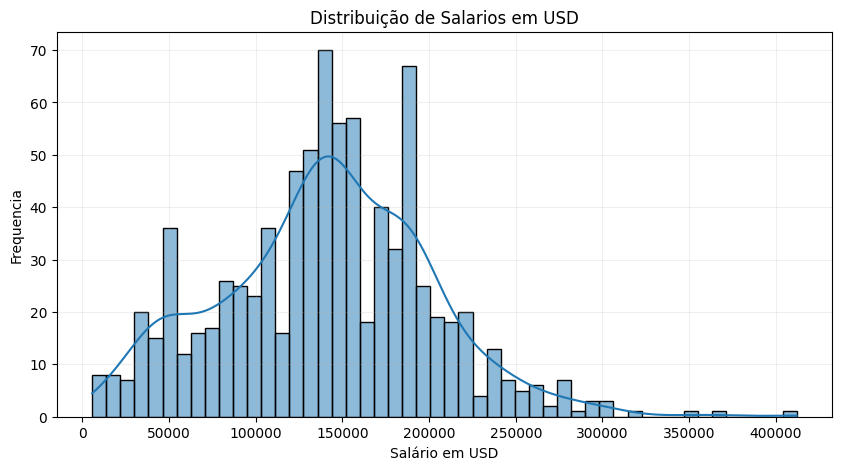

In [11]:
# Analisando detalhes de forma visual a distribuição geral do salario

plt.figure(figsize=(10, 5))
sns.histplot(data=data_scientist_df, x='salario_em_usd', palette='tab10', kde=True, bins = 50) # Use histplot instead of distplot
plt.xlabel('Salário em USD')
plt.ylabel('Frequencia')
plt.grid(alpha = 0.2)
plt.title('Distribuição de Salarios em USD')
plt.show()

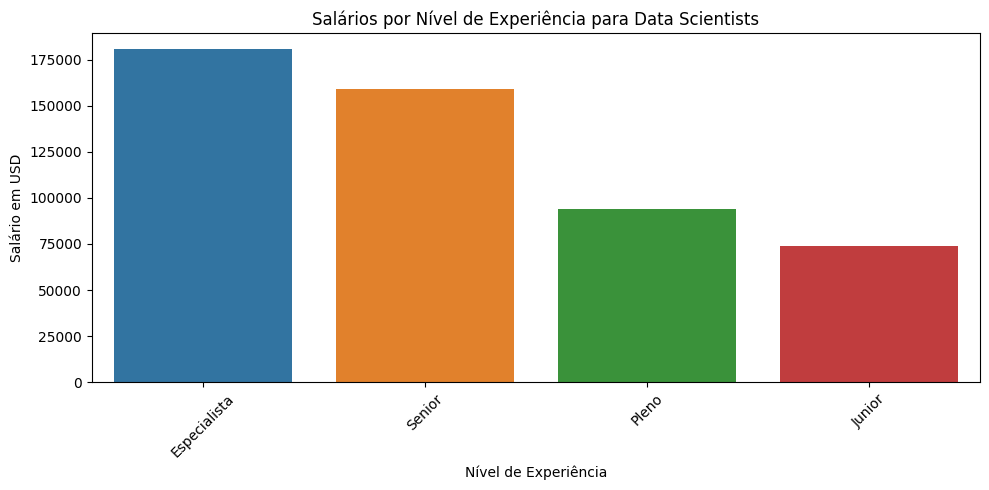

In [12]:
# Analisando detalhes de forma visual media salarial em relação ao nivel de experiencia
plt.figure(figsize=(10, 5))
sns.barplot(x='nivel_de_experiencia', y='salario_em_usd', palette='tab10', data=Data_Scientist)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Salários por Nível de Experiência para Data Scientists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

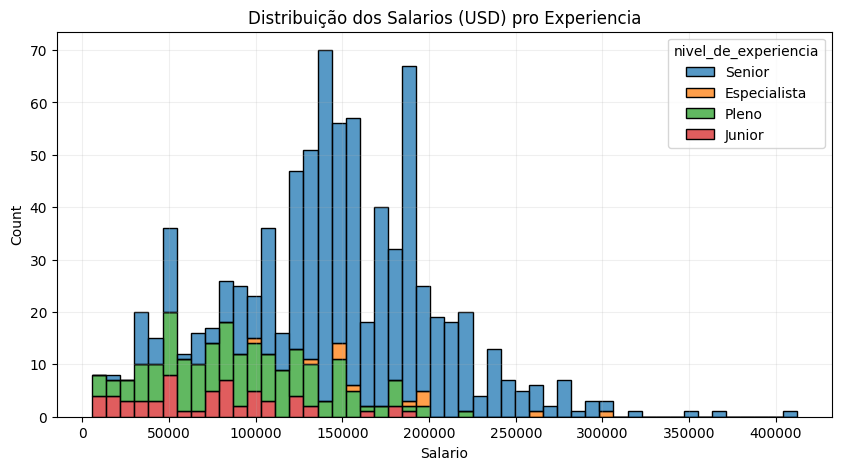

In [13]:
# Analisando detalhes da distribuição dos salarios em relação so nivel de experiencia
plt.figure(figsize = (10, 5))

sns.histplot(x = 'salario_em_usd', hue = 'nivel_de_experiencia', multiple = 'stack', palette='tab10', bins = 50, data = data_scientist_df)

plt.grid(alpha = 0.2)
plt.title('Distribuição dos Salarios (USD) pro Experiencia')
plt.xlabel('Salario')
plt.ylabel('Count')
plt.show()

In [14]:
# Analisando media salarial em relação ao tipo de emprego
Data_Scientist = data_scientist_df
Data_Scientist = Data_Scientist[['tipo_de_emprego','salario_em_usd']].groupby('tipo_de_emprego').mean()
Data_Scientist = Data_Scientist.sort_values(by='salario_em_usd',ascending=False).reset_index()
Data_Scientist

,tipo_de_emprego,salario_em_usd
0,Tempo Integral,141147.050239
1,Freelance,100000.000000
2,Meio Período,77223.000000


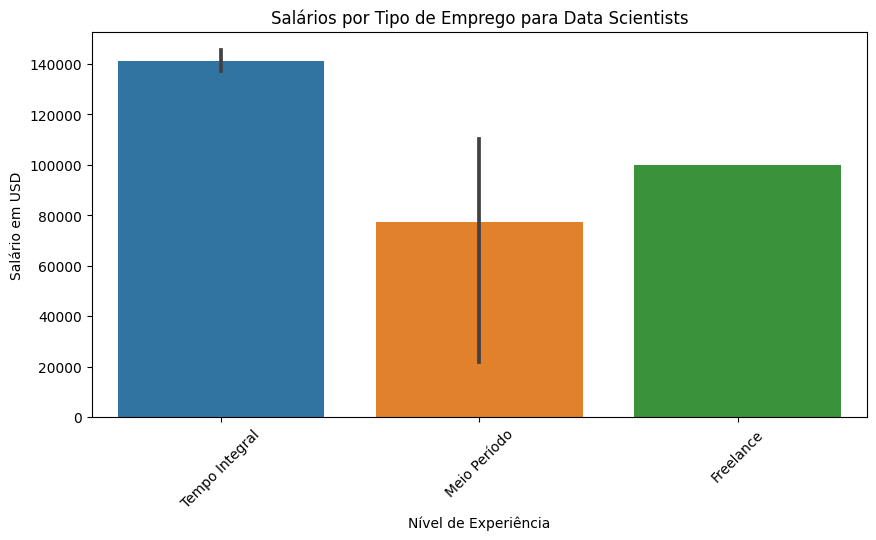

In [15]:
# Analisando detalhes da media salarial em relação ao tipo de emprego
plt.figure(figsize=(10, 5))
sns.barplot(x='tipo_de_emprego', y='salario_em_usd', palette='tab10', data=data_scientist_df)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Salários por Tipo de Emprego para Data Scientists')
plt.xticks(rotation=45)

plt.show()

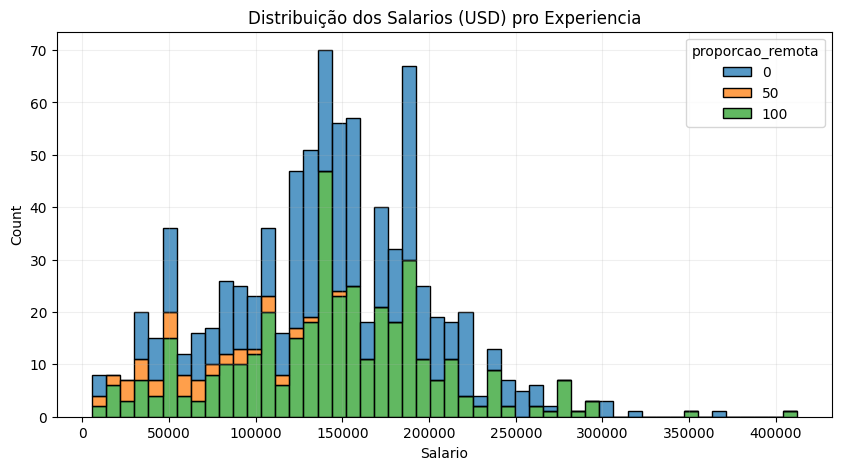

In [16]:
# Analisando distribuição do Salario (USD) por Proporcão de trabalho Remoto
plt.figure(figsize = (10, 5))

sns.histplot(x = 'salario_em_usd', hue = 'proporcao_remota', multiple = 'stack', palette='tab10', bins = 50, data = data_scientist_df)

plt.grid(alpha = 0.2)
plt.title('Distribuição dos Salarios (USD) pro Experiencia')
plt.xlabel('Salario')
plt.ylabel('Count')
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_22124\2784757715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scientist_df['Categoria do Remoto'] = data_scientist_df['proporcao_remota'].apply(lambda x: 'Presencial' if x == 0 else ('Semi Presencial' if x == 50 else 'Remoto'))


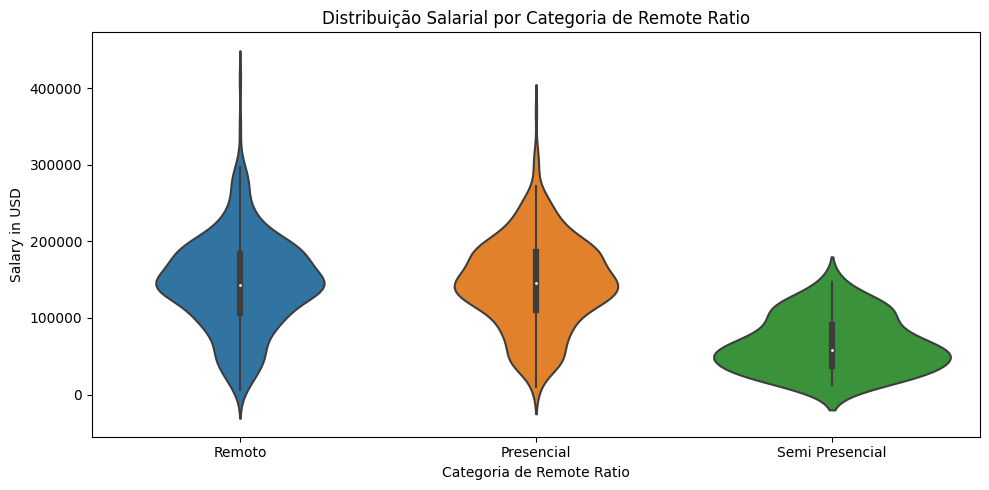

C:\Users\ricar\AppData\Local\Temp\ipykernel_22124\2784757715.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scientist_df.drop(columns=['Categoria do Remoto'], inplace=True)


In [17]:
# Categorizar remote_ratio como Presencial (0), Semi Presencial (50) e Remoto (100)
data_scientist_df['Categoria do Remoto'] = data_scientist_df['proporcao_remota'].apply(lambda x: 'Presencial' if x == 0 else ('Semi Presencial' if x == 50 else 'Remoto'))

plt.figure(figsize=(10, 5))
sns.violinplot(x='Categoria do Remoto', y='salario_em_usd', palette='tab10', data=data_scientist_df)
plt.xlabel('Categoria de Remote Ratio')
plt.ylabel('Salary in USD')
plt.title('Distribuição Salarial por Categoria de Remote Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
data_scientist_df.drop(columns=['Categoria do Remoto'], inplace=True)

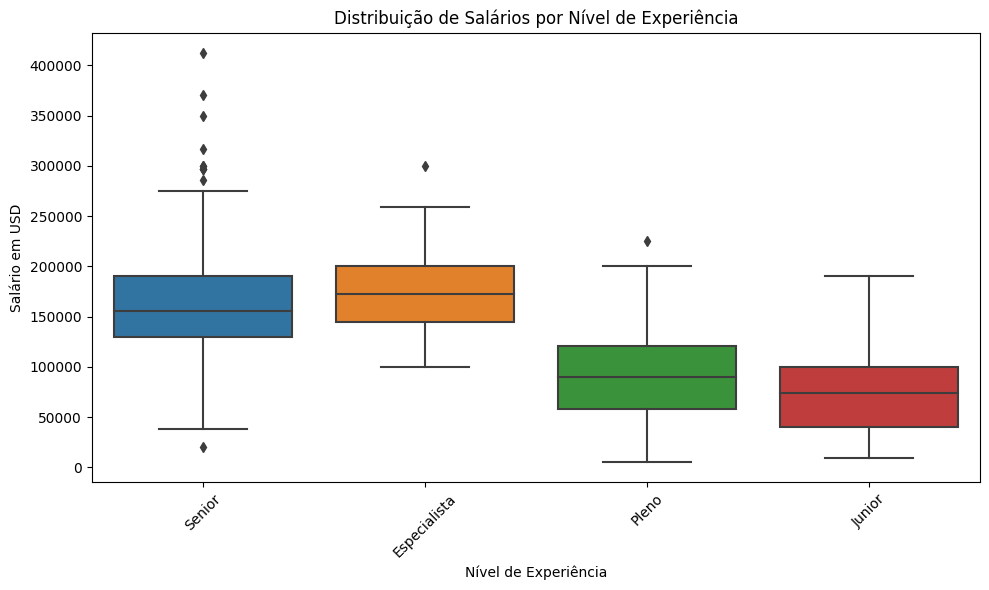

In [18]:
#Distribuição de Salários por Nível de Experiência:
plt.figure(figsize=(10, 6))
sns.boxplot(x='nivel_de_experiencia', y='salario_em_usd', palette='tab10', data=data_scientist_df)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Nível de Experiência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

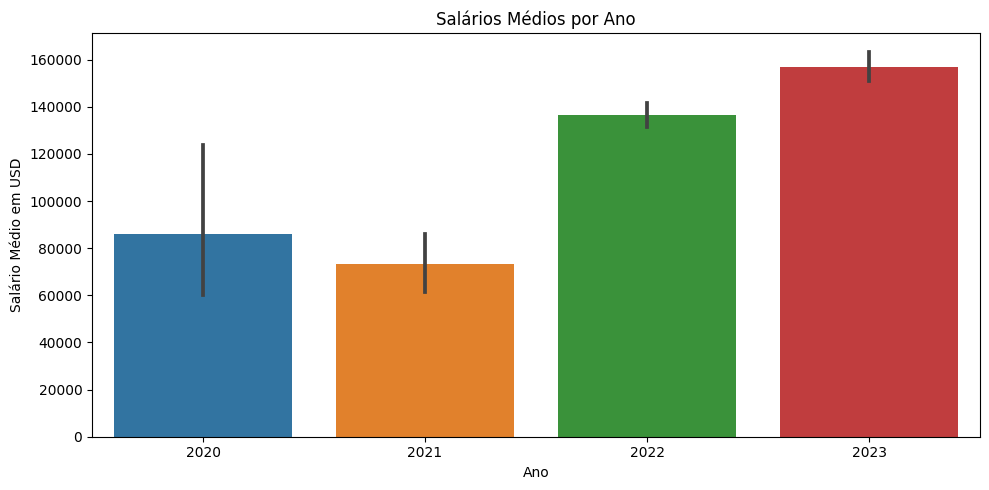

In [19]:
#Salários dos Data Scientists por Ano:
plt.figure(figsize=(10, 5))

sns.barplot(x='ano_de_trabalho', y='salario_em_usd', palette='tab10', data=data_scientist_df)


plt.xlabel('Ano')
plt.ylabel('Salário Médio em USD')
plt.title('Salários Médios por Ano')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

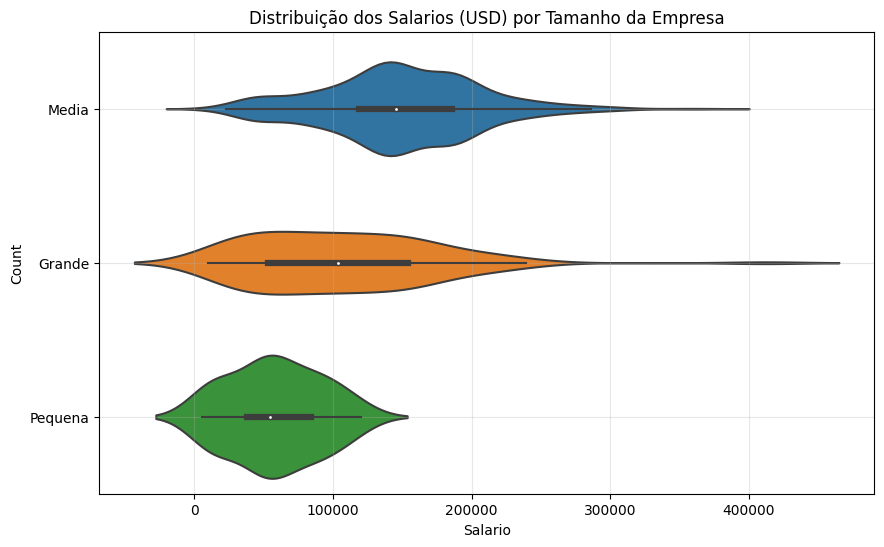

In [20]:
# Distribuição dos Salarios (USD)de Data Science por Tamanho da Empresa
plt.figure(figsize = (10, 6))

sns.violinplot(x = 'salario_em_usd', y = 'tamanho_da_empresa', palette='tab10', data = data_scientist_df)

plt.grid(alpha = 0.3)
plt.title('Distribuição dos Salarios (USD) por Tamanho da Empresa')
plt.xlabel('Salario')
plt.ylabel('Count')

**Preparando os dados para modelos:**

In [21]:
# Verificando a proporção da job_title
df_original['job_title'].value_counts()
df = df_original.copy()

In [23]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [24]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with_dummies = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [25]:
# transformando a target
y_target = np.where(df['job_title'] == 'Data Scientist', 1, 0)
y_target

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
#Separando em train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_dummies,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify = y_target)

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Instancie o modelo

model = DecisionTreeClassifier(random_state = 42)
# Fit do Modelo

model.fit(X_train, y_train)
# Predict do Modelo

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       875
           1       0.44      0.35      0.39       252

    accuracy                           0.76      1127
   macro avg       0.63      0.61      0.62      1127
weighted avg       0.74      0.76      0.74      1127



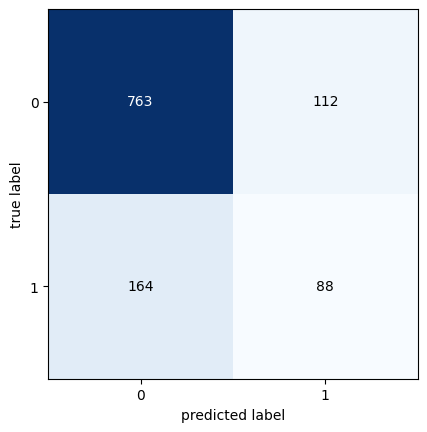

In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


#patamares = ["Patamar 1", "Patamar 2", "Patamar 3", "Patamar 4", "Patamar 5", "Patamar 6", "Patamar 7", "Patamar 8", "Patamar 9", "Patamar 10"]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm,)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=80,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       875
           1       0.50      0.34      0.40       252

    accuracy                           0.78      1127
   macro avg       0.66      0.62      0.63      1127
weighted avg       0.75      0.78      0.76      1127



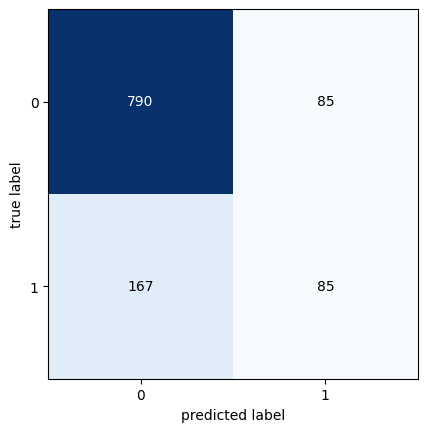

In [30]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [32]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(
    n_estimators=500,
    random_state=42
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       875
           1       0.59      0.13      0.21       252

    accuracy                           0.79      1127
   macro avg       0.69      0.55      0.54      1127
weighted avg       0.75      0.79      0.73      1127



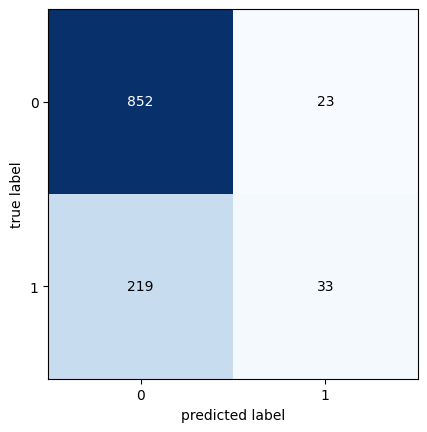

In [33]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       875
           1       0.64      0.07      0.13       252

    accuracy                           0.78      1127
   macro avg       0.71      0.53      0.50      1127
weighted avg       0.75      0.78      0.71      1127



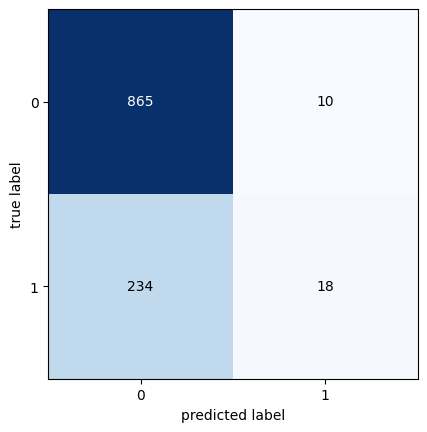

In [35]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [36]:
# Importando o XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       875
           1       0.50      0.25      0.34       252

    accuracy                           0.78      1127
   macro avg       0.66      0.59      0.60      1127
weighted avg       0.74      0.78      0.75      1127



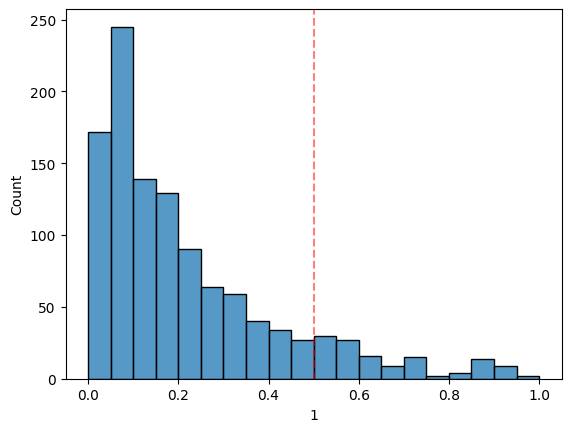

In [37]:
# Probabilidade de predizer se uma amostra pertence a classe 1
sns.histplot(pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])[1], bins=np.arange(0, 1.05, 0.05))

plt.axvline(0.5, ls='--', color='red', alpha=0.5)

In [38]:
data = pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])
data['target'] = y_test
data['limiar_0.5'] = data[1].apply(lambda x: 1 if x >= 0.5 else 0, 1)
data['limiar_0.9'] = data[1].apply(lambda x: 1 if x >= 0.9 else 0, 1)
data['limiar_0.3'] = data[1].apply(lambda x: 1 if x >= 0.3 else 0, 1)

In [39]:
# Observando se há melhoria do modelo
print('limiar: 0.3')
display((data['target'] == data['limiar_0.3']).value_counts())

print('-'*42)
print('limiar: 0.5')
display((data['target'] == data['limiar_0.5']).value_counts())

print('-'*42)
print('limiar: 0.9')
display((data['target'] == data['limiar_0.9']).value_counts())

limiar: 0.3


True     809
False    318
Name: count, dtype: int64

------------------------------------------
limiar: 0.5


True     875
False    252
Name: count, dtype: int64

------------------------------------------
limiar: 0.9


True     880
False    247
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 588, number of negative: 2040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 2628, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223744 -> initscore=-1.243978
[LightGBM] [Info] Start training from score -1.243978
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       875
           1       0.61      0.21      0.32       252

    accuracy                           0.79      1127
   macro avg       0.71      0.59      0.60      1127
weighted avg       0.76      0.79      0.75      1127



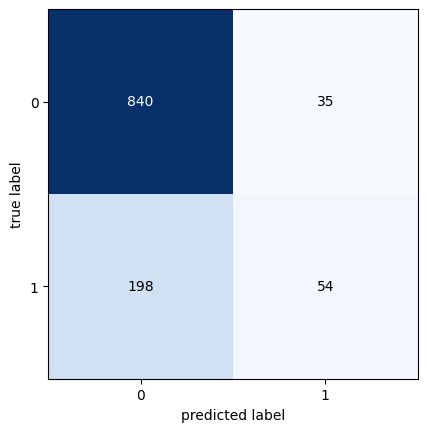

In [40]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(random_state=42)

model_lgb.fit(X_train, y_train)

y_pred = model_lgb.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

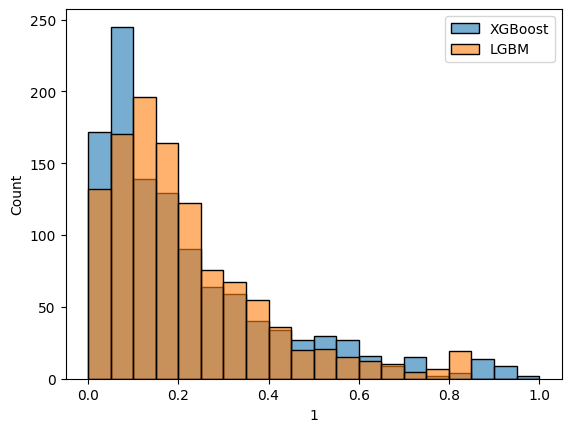

In [41]:
predict_xgb = pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])[1]
predict_lgb = pd.DataFrame(model_lgb.predict_proba(X_test), columns=[0, 1])[1]

bins = np.arange(0, 1.05, 0.05)
sns.histplot(predict_xgb, bins=bins, alpha=0.6, label='XGBoost')
sns.histplot(predict_lgb, bins=bins, alpha=0.6, label='LGBM')

plt.legend()
# plt.axvline(0.9, ls='--', color='red', alpha=0.5)

In [42]:
from sklearn import metrics


def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)


        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model      : {model_name}")
        print(f"Accuracy   : {accuracy:.4f} ")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"F1 - Score : {f1_score:.4f} ")
        print(f"ROC - AUC  : {auc:.4f} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,
        }


    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response

In [43]:
from lightgbm.sklearn import LGBMClassifier

random_seed = 42

list_models = [
  {
      "model_name": "Decision Tree",
      "estimator": DecisionTreeClassifier(random_state=random_seed)
  },
  {
      "model_name": "Random Forest",
      "estimator": RandomForestClassifier(random_state=random_seed)
  },
  {
      "model_name": "AdaBoost",
      "estimator": AdaBoostClassifier(random_state=random_seed)
  },
  {
      "model_name": "GradientBoosting",
      "estimator": GradientBoostingClassifier(random_state=random_seed)
  },
  {
      "model_name": "XGBoost",
      "estimator": XGBClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM",
      "estimator": lgb.LGBMClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM - Opt",
      "estimator": lgb.LGBMClassifier(random_state=random_seed, num_leaves=17, min_child_samples= 10)
  }
]

Model      : Decision Tree
Accuracy   : 0.7551 
Precision  : 0.7374
Recall     : 0.7551
F1 - Score : 0.7445 
ROC - AUC  : 0.6106 
Model      : Random Forest
Accuracy   : 0.7746 
Precision  : 0.7511
Recall     : 0.7746
F1 - Score : 0.7583 
ROC - AUC  : 0.6189 
Model      : AdaBoost
Accuracy   : 0.7711 
Precision  : 0.6787
Recall     : 0.7711
F1 - Score : 0.6854 
ROC - AUC  : 0.5050 
Model      : GradientBoosting
Accuracy   : 0.7835 
Precision  : 0.7548
Recall     : 0.7835
F1 - Score : 0.7092 
ROC - AUC  : 0.5300 
Model      : XGBoost
Accuracy   : 0.7764 
Precision  : 0.7421
Recall     : 0.7764
F1 - Score : 0.7473 
ROC - AUC  : 0.5904 
[LightGBM] [Info] Number of positive: 588, number of negative: 2040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of dat

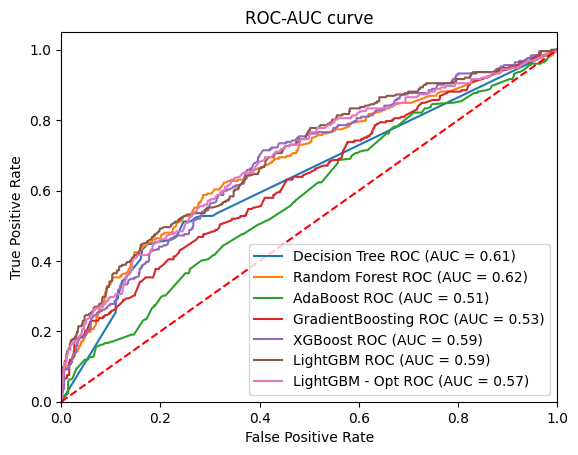

In [44]:
pipeline_response = test_models_plot_roc_auc_curve(
    list_models,
    X_train,
    X_test,
    y_train,
    y_test
)

In [45]:
resp = []
for modelo, modelo_metricas  in pipeline_response.items():
  metricas = []
  metricas.append(modelo)
  for metrica in modelo_metricas.values():
    metricas.append(metrica)
  resp.append(metricas)

In [46]:
metricas_df = pd.DataFrame(resp, columns=['modelo'] + list(pipeline_response['Decision Tree'].keys()))
metricas_df

,modelo,accuracy,precision,recall,f1_score,auc
0,Decision Tree,0.755102,0.737426,0.755102,0.744548,0.610603
1,Random Forest,0.774623,0.751131,0.774623,0.758287,0.618937
2,AdaBoost,0.771074,0.678710,0.771074,0.685372,0.505048
3,GradientBoosting,0.783496,0.754831,0.783496,0.709178,0.530000
4,XGBoost,0.776398,0.742090,0.776398,0.747313,0.590413
5,LightGBM,0.793256,0.763967,0.793256,0.752652,0.587143
6,LightGBM - Opt,0.789707,0.757955,0.789707,0.741553,0.570730


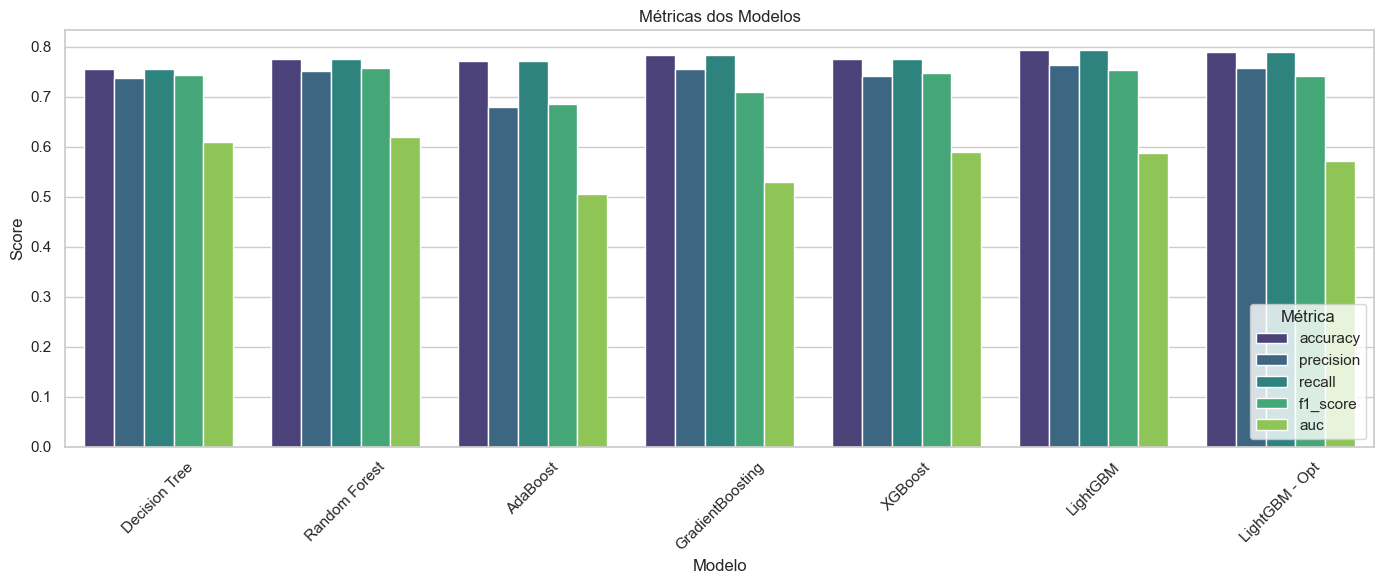

In [47]:
df_melted = pd.melt(metricas_df, id_vars=["modelo"], var_name="metrica", value_name="valor")
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='modelo', y='valor', hue='metrica', palette='viridis')

plt.xticks(rotation=45)
plt.xlabel("Modelo")
plt.ylabel("Score")
plt.title("Métricas dos Modelos")
plt.legend(title="Métrica", loc='lower right')  # Posição da legenda
plt.tight_layout()
plt.show()

In [48]:
# Calculando a média das métricas para cada modelo
metricas_df['media'] = metricas_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc']].mean(axis=1)

# Encontrando o modelo com a melhor média
melhor_modelo = metricas_df.loc[metricas_df['media'].idxmax()]

print("Melhor modelo em média:")
print(melhor_modelo)

Melhor modelo em média:
modelo       LightGBM
accuracy     0.793256
precision    0.763967
recall       0.793256
f1_score     0.752652
auc          0.587143
media        0.738055
Name: 5, dtype: object


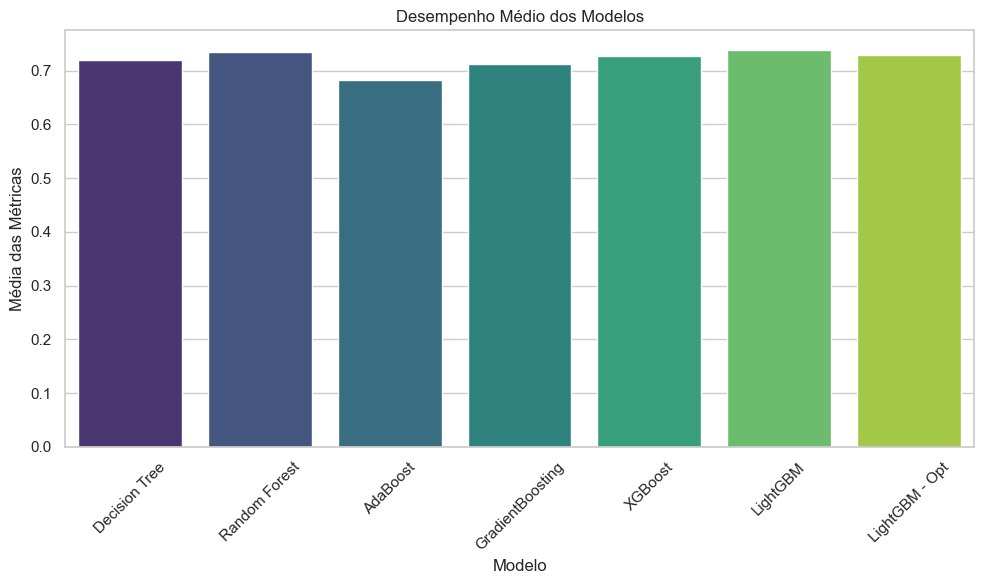

In [49]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(data=metricas_df, x='modelo', y='media', palette='viridis')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xlabel("Modelo")
plt.ylabel("Média das Métricas")
plt.title("Desempenho Médio dos Modelos")
plt.tight_layout()
plt.show()

# Testando com o LabelEncoder

In [50]:
df = df_original.copy()

In [51]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [52]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [53]:
# Transformando os dados com LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = ['experience_level', 'employment_type','salary_currency','employee_residence','company_location','company_size']
X[cols]=X[cols].apply(LabelEncoder().fit_transform)
X.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,80000,7,85847,26,100,25,0
1,2023,2,0,30000,19,30000,75,100,70,2
2,2023,2,0,25500,19,25500,75,100,70,2
3,2023,3,2,175000,19,175000,11,100,12,1
4,2023,3,2,120000,19,120000,11,100,12,1


In [54]:
X.head().T

,0,1,2,3,4
work_year,2023,2023,2023,2023,2023
experience_level,3,2,2,3,3
employment_type,2,0,0,2,2
salary,80000,30000,25500,175000,120000
salary_currency,7,19,19,19,19
salary_in_usd,85847,30000,25500,175000,120000
employee_residence,26,75,75,11,11
remote_ratio,100,100,100,100,100
company_location,25,70,70,12,12
company_size,0,2,2,1,1


In [55]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,3755.0,2.469241,0.906261,0.0,2.0,3.0,3.0,3.0
employment_type,3755.0,1.996538,0.133550,0.0,2.0,2.0,2.0,3.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_currency,3755.0,17.409587,4.062710,0.0,19.0,19.0,19.0,19.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
employee_residence,3755.0,66.149401,19.235212,0.0,75.0,75.0,75.0,77.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0
company_location,3755.0,62.117177,17.495432,0.0,70.0,70.0,70.0,71.0
company_size,3755.0,0.918509,0.392071,0.0,1.0,1.0,1.0,2.0
